In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
img = np.array([[[100, 100, 100], [150, 150, 150]],  # Row 1
                [[200, 200, 200], [50, 50, 50]]],    # Row 2
                dtype=np.uint8)

img

array([[[100, 100, 100],
        [150, 150, 150]],

       [[200, 200, 200],
        [ 50,  50,  50]]], dtype=uint8)

Here 
1st row 1st pixel = [100,100,100]

1st row 2nd pixel = [150,150,150]

2nd row 1st pixel = [200,200,200]

2nd row 2nd pixel = [50,50,50]

# Visualizing the color channels in 3d image

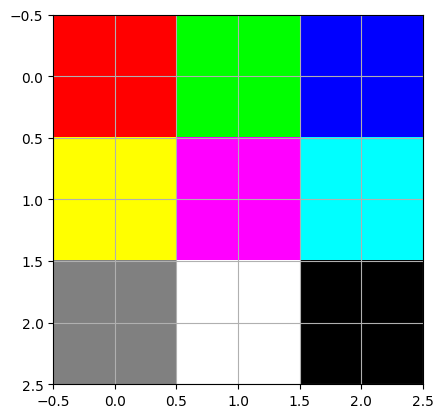

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a 3x3 RGB image
image = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255]],   # Row 1
                  [[255, 255, 0], [255, 0, 255], [0, 255, 255]],  # Row 2
                  [[128, 128, 128], [255, 255, 255], [0, 0, 0]]], # Row 3
                 dtype=np.uint8)

# Displaying the image
plt.imshow(image)
plt.grid(True)
plt.show()

In [4]:
image = cv2.imread("/Users/meetsudra/Downloads/DiabeticRetino/archive/dr_unified_v2/dr_unified_v2/train/1/5b068765e846.jpg")

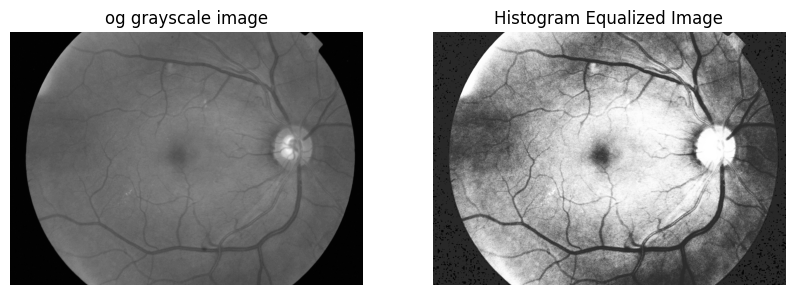

In [5]:
# Check if the image is already grayscale 
def is_grayscale(image):
    if len(image.shape) == 2:
        return True
    if len(image.shape) == 3 and np.array_equal(image[:,:,0],image[:,:,1]) and np.array_equal(image[:,:,1],image[:,:,2]):
        return True   # These are grayscale images 
    return False 

# convert the gray scale image only if its a color image 
if is_grayscale(image):
    grayscale_image = image
else:
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization 
equalized_image = cv2.equalizeHist(grayscale_image)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(grayscale_image,cmap='gray')
plt.title("og grayscale image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.show()



Text(0, 0.5, 'Frequency')

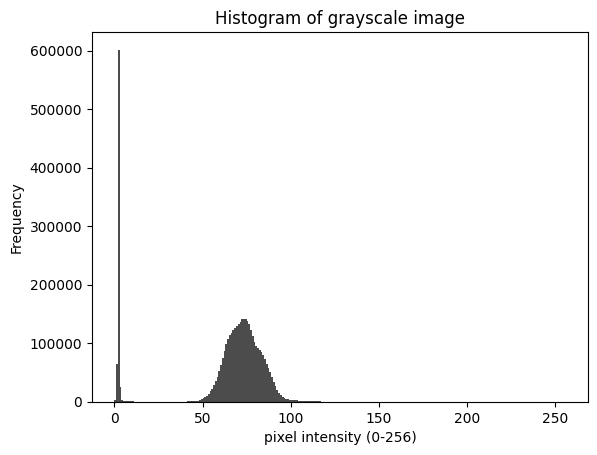

In [6]:
# Histogram of grayscale image 
plt.hist(grayscale_image.ravel(), bins=256, range=[0,256],color='black',alpha=0.7)
plt.title("Histogram of grayscale image")
plt.xlabel("pixel intensity (0-256)")
plt.ylabel("Frequency")

(-0.5, 2415.5, 1735.5, -0.5)

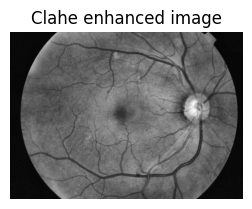

In [7]:
# Lets see what CLAHE makes the difference

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_image = clahe.apply(grayscale_image)

plt.figure(figsize=(3,3))
plt.imshow(clahe_image, cmap='gray')
plt.title("Clahe enhanced image")
plt.axis("off")

This image seems to be more clear and detailed in comparison to that of HE

Text(0.5, 0, 'Pixel Intensity (0-255)')

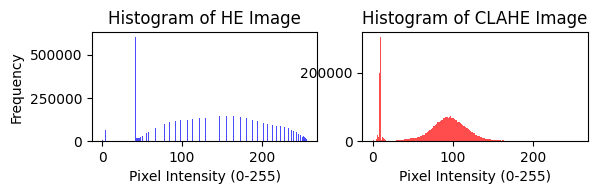

In [8]:
# Histogram of HE Image
plt.subplot(3, 2, 1)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram of HE Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")

# Histogram of CLAHE Image
plt.subplot(3, 2, 2)
plt.hist(clahe_image.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.title("Histogram of CLAHE Image")
plt.xlabel("Pixel Intensity (0-255)")



Histogram Equilization normalizes previous histogram values of og grayscale image to a distributed(HE)/flat profile or low contrast image highlighting the details of the image(CLAHE)  

### Difference

 Histogram Equilization improves contrast globally and may over-enhance some high intensity pixels 

 Clahe works locally by dividing the image into small sizes, preventing over-enhancement and noise amplification